<a href="https://colab.research.google.com/github/Ignas12345/Project-in-Computational-Biology/blob/main/Edges_pagrindinis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Nikronic/EdgeNet.git
!mv EdgeNet/* ./

fatal: destination path 'EdgeNet' already exists and is not an empty directory.
mv: cannot stat 'EdgeNet/*': No such file or directory


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import v2, ToTensor, ToPILImage

from EdgeNet import EdgeNet
from helpers import plot

orig_img = Image.open('High_resolution_iteration_50.jpg')

In [ ]:
def image_to_tensor(image):
  tensor = ToTensor()(image)
  return tensor.unsqueeze(0)

def tensor_to_image(tensor):
  tensor = tensor.squeeze()
  return ToPILImage()(tensor)

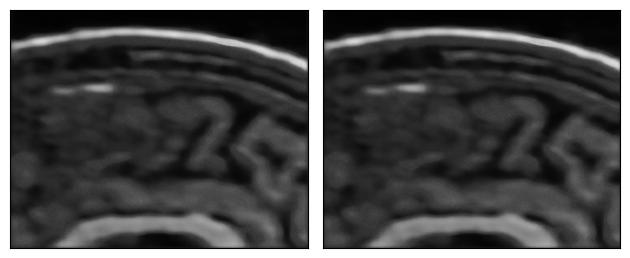

In [ ]:
gray_img = v2.Grayscale()(orig_img)
plot([orig_img, gray_img], cmap='gray')

In [ ]:
edgenet = EdgeNet(input_channels = 1)
edgenet.load_state_dict(torch.load('Black_and_white_model_parameters_3'))

<All keys matched successfully>

In [ ]:
print(ToTensor()(gray_img))

tensor([[[0.9490, 0.9490, 0.9490,  ..., 0.6275, 0.6275, 0.6235],
         [0.9490, 0.9490, 0.9490,  ..., 0.6353, 0.6353, 0.6314],
         [0.9451, 0.9451, 0.9490,  ..., 0.6392, 0.6392, 0.6392],
         ...,
         [0.7020, 0.6824, 0.6706,  ..., 0.4235, 0.4196, 0.4157],
         [0.6627, 0.6549, 0.6510,  ..., 0.4471, 0.4510, 0.4549],
         [0.6275, 0.6275, 0.6314,  ..., 0.4627, 0.4706, 0.4824]]])


In [ ]:
output = edgenet(image_to_tensor(gray_img))

In [ ]:
torch.Tensor.size(image_to_tensor(gray_img))

torch.Size([1, 1, 145, 181])

In [ ]:
print(torch.Tensor.size(output))

torch.Size([1, 1, 145, 181])


In [ ]:
output_img = tensor_to_image(output)

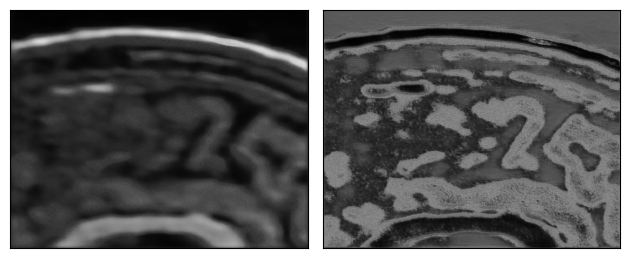

In [ ]:
plot([gray_img, output_img], cmap = 'gray')

In [ ]:
output_img.save('underfitted_edges.jpg')